# Before you start using google colab to practice python code, read and follow through `GoogleColabTutorial.ipynb`

# Examples \& Exercises
The below toy example reads and visulize the bathymetry map of the Western Atlantic Ocean and CTD profiles along the [GO-SHP A20 section](https://usgoship.ucsd.edu/hydromap/), you may try the toy example by running the following scripts. Assignments will be the  <font color="orange">Exercises</font>. You can utilize the code from the examples or create your own. 
<!-- Undergrad students are *not* required to complete the "Exercise for grad students". -->

## 1. Import a bunch of libraries

In [1]:
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install netcdf4
# !pip install xarray
# !pip install ipympl
# # resetart kernel
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [2]:
# # to enable the jupyter widgets so that you can plot interactive figures
# from google.colab import output
# output.enable_custom_widget_manager()

In [3]:
# import python libraries
import xarray as xr
import numpy as np
import gsw
from matplotlib import cm
import matplotlib.pyplot as plt

## 2. Load \& plot the ocean bathymetry and see how the ocean bottom looks like!

In [4]:
# load ocean topography data (ETOPO2022 - bedrock - 60 arc second: https://www.ncei.noaa.gov/products/etopo-global-relief-model) 
opendap_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/60s/60s_bed_elev_netcdf/ETOPO_2022_v1_60s_N90W180_bed.nc?lat[0:10:10799],lon[0:10:21599],z[0:10:10799][0:10:21599]'
ds = xr.open_dataset(opendap_url, engine='netcdf4')
ds

<xarray.Dataset> Size: 9MB
Dimensions:  (lat: 1080, lon: 2160)
Coordinates:
  * lat      (lat) float64 9kB -89.99 -89.83 -89.66 -89.49 ... 89.51 89.68 89.84
  * lon      (lon) float64 17kB -180.0 -179.8 -179.7 ... 179.5 179.7 179.8
Data variables:
    z        (lat, lon) float32 9MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0
    crs.DODS.strlen:                0

## 3. Load NetCDF data

The data can be downloaded via the link: https://cchdo.ucsd.edu/cruise/325020210420 

The CTD profiles have been rendered into one NetCDF file, you may load all the profiles at once. However, you may find some dataset containing individual NetCDF files for each CTD profile. Try using a "for loop" to load .nc data into Numpy arrays and create a DataSet. 

(A20 section, *RV Thompson*, 2021-04-20 $\sim$ 2021-05-16)

In [1]:
# import python libraries
import xarray as xr
import numpy as np
import gsw
from matplotlib import cm
import matplotlib.pyplot as plt

In [4]:
# load ocean topography data (ETOPO2022 - bedrock - 60 arc second: https://www.ncei.noaa.gov/products/etopo-global-relief-model) 
opendap_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/60s/60s_bed_elev_netcdf/ETOPO_2022_v1_60s_N90W180_bed.nc?lat[0:10:10799],lon[0:10:21599],z[0:10:10799][0:10:21599]'
ds = xr.open_dataset(opendap_url, engine='netcdf4')
ds

<xarray.Dataset> Size: 9MB
Dimensions:  (lat: 1080, lon: 2160)
Coordinates:
  * lat      (lat) float64 9kB -89.99 -89.83 -89.66 -89.49 ... 89.51 89.68 89.84
  * lon      (lon) float64 17kB -180.0 -179.8 -179.7 ... 179.5 179.7 179.8
Data variables:
    z        (lat, lon) float32 9MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0
    crs.DODS.strlen:                0

In [2]:
datafilepath = '../data/lecture01/'
filename = '325020210420_ctd.nc'

Data = xr.open_dataset(datafilepath + filename)
Data

<xarray.Dataset> Size: 21MB
Dimensions:                     (N_PROF: 90, N_LEVELS: 3064)
Coordinates:
    pressure                    (N_PROF, N_LEVELS) float64 2MB ...
    latitude                    (N_PROF) float64 720B ...
    longitude                   (N_PROF) float64 720B ...
    time                        (N_PROF) datetime64[ns] 720B ...
    expocode                    (N_PROF) object 720B ...
    station                     (N_PROF) object 720B ...
    cast                        (N_PROF) int8 90B ...
    sample                      (N_PROF, N_LEVELS) object 2MB ...
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables: (12/15)
    section_id                  (N_PROF) object 720B ...
    btm_depth                   (N_PROF) float64 720B ...
    ctd_temperature             (N_PROF, N_LEVELS) float64 2MB ...
    ctd_temperature_qc          (N_PROF, N_LEVELS) float32 1MB ...
    ctd_salinity                (N_PROF, N_LEVELS) float64 2MB ...
    ctd_salinity_qc             (N_PROF, N_LEVELS) float32 1MB ...
    ...                          ...
    ctd_fluor_raw_qc            (N_PROF, N_LEVELS) float32 1MB ...
    ctd_transmissometer_raw     (N_PROF, N_LEVELS) float64 2MB ...
    ctd_transmissometer_raw_qc  (N_PROF, N_LEVELS) float32 1MB ...
    instrument_id               (N_PROF) object 720B ...
    profile_type                (N_PROF) object 720B ...
    geometry_container          float64 8B ...
Attributes:
    Conventions:               CF-1.8 CCHDO-1.0
    cchdo_software_version:    hydro 1.0.1.3
    cchdo_parameters_version:  params 0.1.13
    comments:                  ship: R/V Thomas G Thompson (3250)\ndates: 202...
    featureType:               profile

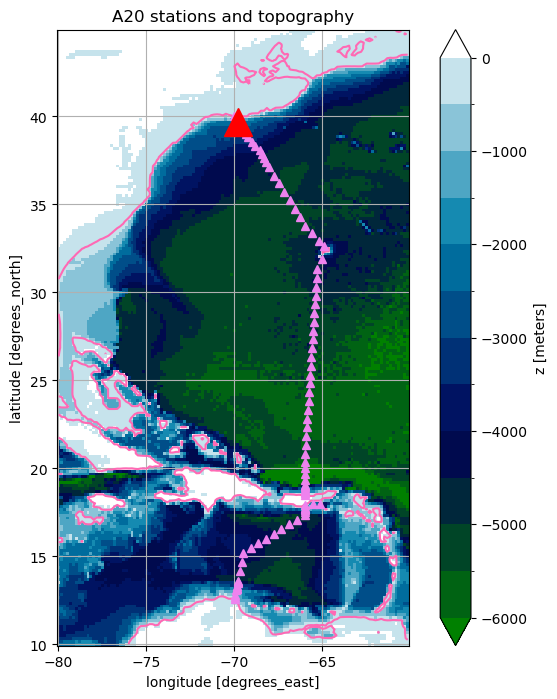

In [5]:
# visualize CTD stations

lat = [10, 45]
lon = [-80, -60]
mask_lat = np.where((ds.lat > lat[0]) & (ds.lat <= lat[1]))[0]
mask_lon = np.where((ds.lon > lon[0]) & (ds.lon <= lon[1]))[0]
# to display station 85
idx_station = 85

# map the topography
# ("plotting", see more: https://xarray.pydata.org/en/stable/user-guide/plotting.html)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ds.z[mask_lat, mask_lon].plot.pcolormesh(ax=ax, vmax=0, vmin=-6000, levels=13, 
                                        cmap=cm.ocean, x='lon', y='lat', add_colorbar=True)
ds.z[mask_lat, mask_lon].plot.contour(ax=ax, levels=[-200], colors = 'hotpink', linestyles = '-')
ax.plot(Data.longitude, Data.latitude, marker='^', c='violet', label='A20 2021', linestyle='none')
ax.plot(Data.longitude[idx_station], Data.latitude[idx_station], marker='^', markersize = 20, c='red', label='A20 2021', linestyle='none')
# ax.plot(lon, np.ones(np.shape(lon))*lat_demo, 'y--')
ax.set_title('A20 stations and topography')
ax.grid(True)
ax.set_aspect('equal', adjustable='box')

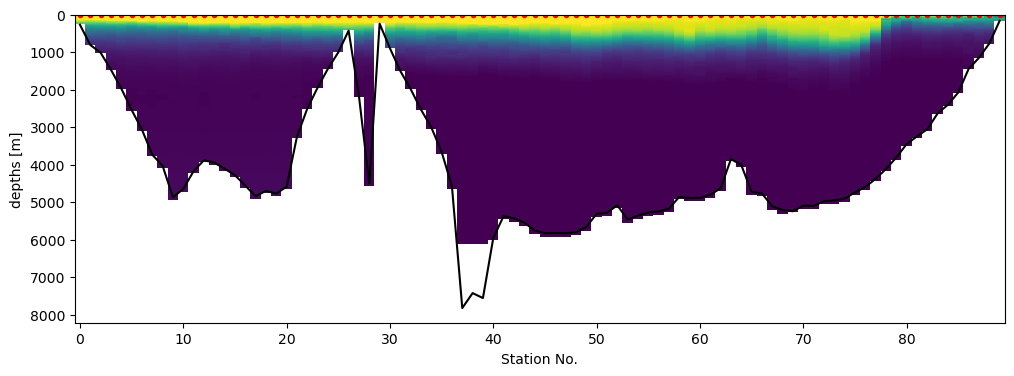

In [6]:
# quickly take a look at the CTD temperature section
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

# x-axis is station number, y-aixs is depth, which is roughly 2*level numbers (NOTE: this is a rough estimate)
ax.pcolormesh(Data.N_PROF, 2*Data.N_LEVELS, Data.ctd_temperature.data.T, vmax=20, vmin=4)
# plot bottom depth
ax.plot(Data.N_PROF, Data.btm_depth.data, c='k')
# mark CTD stations
ax.plot(Data.N_PROF.data, np.zeros(Data.N_PROF.data.shape), 'r.')
ax.set_ylabel('depths [m]')
ax.set_xlabel('Station No.')

ax.invert_yaxis()

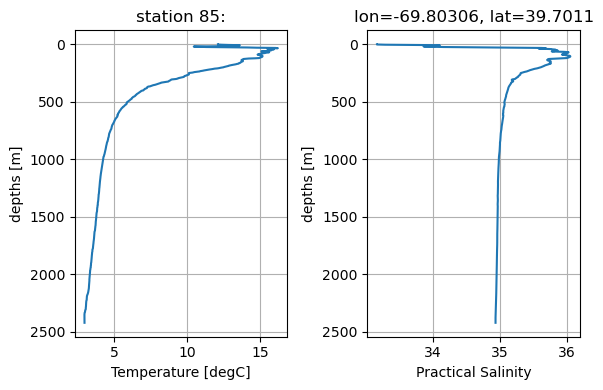

In [7]:
# quickly look at a single CTD profile, station 10
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

# ctd temperature
ax[0].plot(Data.ctd_temperature[Data.station == f'{idx_station}',:].data.flatten(), 2*Data.N_LEVELS)
ax[0].invert_yaxis()
# ctd salinity
ax[1].plot(Data.ctd_salinity[Data.station == f'{idx_station}',:].data.flatten(), 2*Data.N_LEVELS)
ax[1].invert_yaxis()
ax[0].set_title(f'station {idx_station}:')
ax[1].set_title(f'lon={Data.longitude[idx_station].data}, lat={Data.latitude[idx_station].data}')
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel('depths [m]')
ax[0].set_xlabel('Temperature [degC]')
ax[1].set_ylabel('depths [m]')
ax[1].set_xlabel('Practical Salinity')
plt.tight_layout()

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> 1. Try computing z from pressure using gsw.z_from_p and plot with latitude and depth
2. Try create a DataSet with dimensions (latitude) and (depth), you may want to interpolate your data onto evenly gridded depth coordinate
</div>